# Assignment 3

All functions can be implemented using DataFrames, ApacheSparkSQL or RDDs.

In [5]:
def minTemperature(df,spark):
    return spark.sql("SELECT MIN(temperature) as mintemp from washing").first().mintemp

In [5]:
def meanTemperature(df,spark):
    return spark.sql("SELECT MEAN(temperature) as meantemp from washing").first().meantemp

In [7]:
def maxTemperature(df,spark):
    return spark.sql("SELECT MAX(temperature) as maxtemp from washing").first().maxtemp

The standard deviation of the temperature

In [4]:
import pyspark.sql.functions

In [24]:
def sdTemperature(df,spark):
    return spark.sql("SELECT stddev_pop(temperature) as sdtemp from washing").first().sdtemp

The skew of the temperature:

In [27]:
def skewTemperature(df,spark):    
    return spark.sql("""
SELECT 
    (
        1/COUNT(*)
    ) *
    SUM (
        POWER(temperature - %s, 3)/POWER(%s,3)
    )

as sktemperature from washing
                    """ %(meanTemperature(df,spark),sdTemperature(df,spark))).first().sktemperature

Kurtosis is the 4th statistical moment

In [29]:
def kurtosisTemperature(df,spark):    
        return spark.sql("""
SELECT 
    (
        1/COUNT(*)
    ) *
    SUM (
        POWER(temperature - %s, 4)/POWER(%s,4)
    )
as ktemperature from washing
                    """ %(meanTemperature(df,spark),sdTemperature(df,spark))).first().ktemperature


In [30]:
def correlationTemperatureHardness(df,spark):
    return spark.sql("SELECT corr(temperature,hardness) as temperaturehardness from washing").first().temperaturehardness

Now it is time to grab a PARQUET file and create a dataframe out of it.

In [21]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2019-12-03 22:06:34--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet [following]
--2019-12-03 22:06:35--  https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet [following]
--2019-12-03 22:06:35--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [22]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now let's test the functions

In [7]:
min_temperature = minTemperature(df,spark)
print(min_temperature)

80


In [6]:
mean_temperature = meanTemperature(df,spark)
print(mean_temperature)

90.03800298062593


In [9]:
max_temperature = maxTemperature(df,spark)
print(max_temperature)

100


In [26]:
sd_temperature = sdTemperature(df,spark)
print(sd_temperature)

6.098487624200337


In [28]:
skew_temperature = skewTemperature(df,spark)
print(skew_temperature)

0.006788255973582835


In [31]:
kurtosis_temperature = kurtosisTemperature(df,spark)
print(kurtosis_temperature)

1.158158434967638


In [32]:
correlation_temperature = correlationTemperatureHardness(df,spark)
print(correlation_temperature)

0.017754069047296324


In [33]:
# !rm -f rklib.py
# !wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2019-12-03 18:56:19--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: 'rklib.py'

100%[======================================>] 2,540       --.-K/s   in 0s      

2019-12-03 18:56:19 (37.5 MB/s) - 'rklib.py' saved [2540/2540]



In [34]:
# from rklib import submitAll
# import json

# key = "Suy4biHNEeimFQ479R3GjA"
# email = 'souha.gaaloul@gmail.com'
# token = 'NakCW3GJxgiCKxTG' #you can obtain it from the grader page on Coursera




In [35]:
# parts_data = {}
# parts_data["FWMEL"] = json.dumps(min_temperature)
# parts_data["3n3TK"] = json.dumps(mean_temperature)
# parts_data["KD3By"] = json.dumps(max_temperature)
# parts_data["06Zie"] = json.dumps(sd_temperature)
# parts_data["Qc8bI"] = json.dumps(skew_temperature)
# parts_data["LoqQi"] = json.dumps(kurtosis_temperature)
# parts_data["ehNGV"] = json.dumps(correlation_temperature)



# submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"TzU1P","id":"sUpST4RAEeawAApvKZgcCQ~TzU1P~s1IZRBX-Eeqm9BIucVmpFw","courseId":"sUpST4RAEeawAApvKZgcCQ"}],"paging":{},"linked":{}}
-------------------------


In [23]:
result = spark.sql("SELECT voltage FROM washing WHERE voltage is not null")
result.collect()

[Row(voltage=236),
 Row(voltage=235),
 Row(voltage=228),
 Row(voltage=236),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=235),
 Row(voltage=220),
 Row(voltage=225),
 Row(voltage=239),
 Row(voltage=230),
 Row(voltage=236),
 Row(voltage=244),
 Row(voltage=235),
 Row(voltage=234),
 Row(voltage=224),
 Row(voltage=225),
 Row(voltage=223),
 Row(voltage=236),
 Row(voltage=226),
 Row(voltage=227),
 Row(voltage=237),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=222),
 Row(voltage=228),
 Row(voltage=227),
 Row(voltage=228),
 Row(voltage=232),
 Row(voltage=225),
 Row(voltage=229),
 Row(voltage=224),
 Row(voltage=235),
 Row(voltage=233),
 Row(voltage=226),
 Row(voltage=239),
 Row(voltage=238),
 Row(voltage=222),
 Row(voltage=226),
 Row(voltage=236),
 Row(voltage=230),
 Row(voltage=235),
 Row(voltage=237),
 Row(voltage=225),
 Row(voltage=228),
 Row(voltage=221),
 Row(voltage=232),
 Row(voltage=221),
 Row(voltage=230),
 Row(voltage=231),
 Row(voltage=220),
 Row(voltage=235),
 Row(voltage

In [24]:
voltages = result.rdd.map(lambda row: row.voltage).sample(False, 0.1).collect()
voltages

[236,
 235,
 225,
 224,
 227,
 229,
 235,
 231,
 231,
 220,
 221,
 226,
 222,
 235,
 234,
 232,
 228,
 227,
 231,
 229,
 238,
 223,
 231,
 230,
 221,
 232,
 220,
 228,
 220,
 238,
 229,
 230,
 229,
 238,
 238,
 226,
 232,
 234,
 250,
 232,
 229,
 221,
 231,
 221,
 236,
 222,
 223,
 232]

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

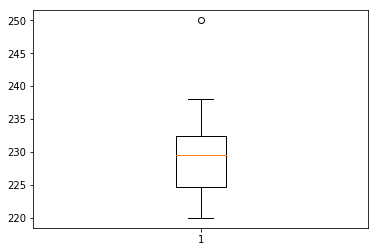

In [26]:
plt.boxplot(voltages)
plt.show()

In [27]:
result = spark.sql("SELECT voltage,ts FROM washing WHERE voltage is not null ORDER BY ts")
result_rdd = result.rdd.map(lambda row: (row.ts,row.voltage)).sample(False, 0.1)

In [34]:
result_array_ts = result_rdd.map(lambda x: x[0]).collect()
result_array_vol = result_rdd.map(lambda x: x[1]).collect()
# result_rdd.take(10)

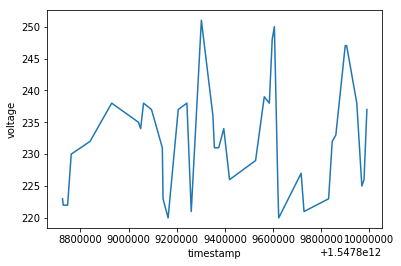

In [37]:
plt.plot(result_array_ts,result_array_vol)
plt.xlabel("timestamp")
plt.ylabel("voltage")
plt.show()

In [40]:
result = spark.sql("SELECT hardness,temperature,flowrate FROM washing WHERE hardness is not null AND temperature is not null AND flowrate is not null")
result_rdd = result.rdd.sample(False, 0.1).map(lambda row: (row.hardness,row.temperature, row.flowrate))
result_rdd.take(10)

[(79, 84, 11),
 (79, 96, 11),
 (80, 84, 11),
 (80, 89, 11),
 (74, 84, 11),
 (110, 96, 11),
 (78, 89, 11),
 (75, 91, 11),
 (77, 85, 11),
 (74, 99, 11)]

In [41]:
result_array_hardness = result_rdd.map(lambda x: x[0]).collect()
result_array_temp = result_rdd.map(lambda x: x[1]).collect()
result_array_flow = result_rdd.map(lambda x: x[2]).collect()

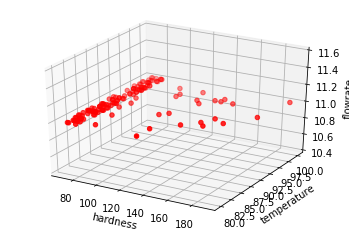

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_array_hardness,result_array_temp,result_array_flow,c='r', marker='o')
ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

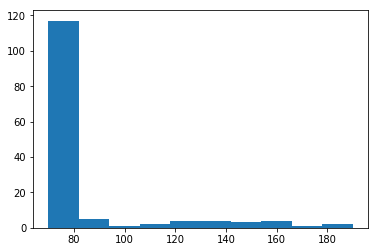

In [44]:
plt.hist(result_array_hardness)
plt.show()

In [ ]:
plt.hist(result_array_hardness)
plt.show()

In [ ]:
plt.hist(result_array_hardness)
plt.show()